# Péndulo simple No Lineal

En este programa se resolverá el problema del péndulo simple no lineal sin amortiguamiento, para ello se hará uso del método de Runge-Kutta 1 o método de Euler para su resolución. Finalmente, y a manera de comparación, se resolverá el mismo problema haciendo la supoción de que estamos trabajando con ángulos pequeños ($sin(\theta) \approx \theta$)


*Modelo No Lineal*


<center>$\frac{d^2\theta}{ dt^2}+\omega_0^2sin(\theta)=0$


*Modelo Lineal*


<center>$\frac{d^2\theta}{ dt^2}+\omega_0^2\theta=0$

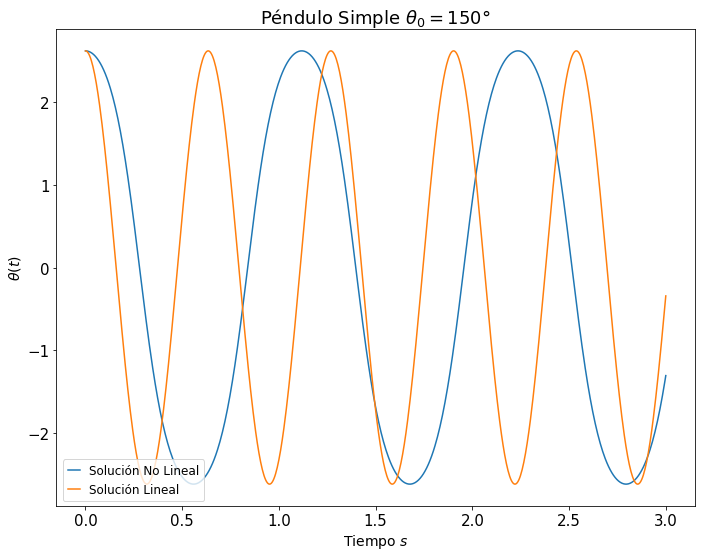

In [42]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp, odeint
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter


g = 9.81
l = 0.1
w = np.sqrt(g/l)
initial_angle = 150
fps = 7

def f(t, r):
    omega = r[0]
    theta = r[1]
    return np.array([-g / l * np.sin(theta), omega])


time = np.linspace(0, 3, fps*100)
init_r = [0, np.radians(initial_angle)]

no_linear = solve_ivp(f, (0, 3), init_r, method='RK45', t_eval=time, rtol=1e-8)
linear = [np.radians(initial_angle) * np.cos(w*t) for t in time]

fig, ax1 = plt.subplots(figsize=(10, 8), tight_layout=True)

ax1.plot(no_linear.t, no_linear.y[1])
ax1.plot(no_linear.t, linear)

ax1.set_title(r"Péndulo Simple $\theta_{0}=$"+f"{initial_angle}°")
ax1.set_ylabel(r"$\theta(t)$", fontsize=14)
ax1.set_xlabel(r"Tiempo $s$", fontsize=14)
ax1.legend(("Solución No Lineal","Solución Lineal",), shadow=False, loc=(0.01, 0.01), handlelength=1, fontsize=12)

plt.show()

## Animación

Animación guardada con éxito


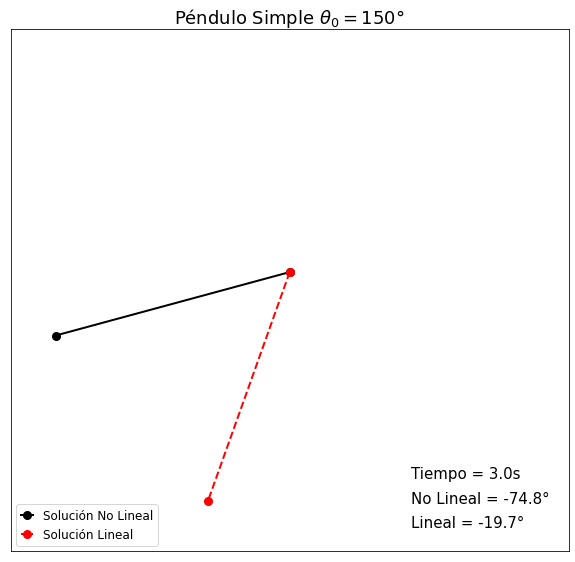

In [79]:
import matplotlib.animation as animation


fig = plt.figure(figsize=(10, 10), facecolor='w')
ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)

plt.rcParams['font.size'] = 15


ax.set_title(r"Péndulo Simple $\theta_{0}=$"+f"{initial_angle}°")
ax.legend(("Solución No Lineal","Solución Lineal",), shadow=False, loc=(0.01, 0.01), handlelength=1, fontsize=12)
ax.set_xlim(-1.15, 1.15)
ax.set_ylim(-1.15, 1.00)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([]) 


lns = []
for i in range(len(no_linear.y[1])):
    angle1 = no_linear.y[1][i]
    angle2 = linear[i]
    ln1, = ax.plot([0, np.sin(angle1)], [0, -np.cos(angle1)],
                  color='k', marker= 'o', markersize=8, lw=2)
    ln2, = ax.plot([0, np.sin(angle2)], [0,  -np.cos(angle2)],
                  color='r', marker= 'o', markersize=8, linestyle = '--', lw=2)
    tm = ax.text(0.5, -0.85, 'Tiempo = %.1fs' %time[i])
    ag1 = ax.text(0.5, -0.95, 'No Lineal = %.1f°' %np.degrees(angle1))
    ag2 = ax.text(0.5, -1.05, 'Lineal = %.1f°' %np.degrees(angle2))

    lns.append([ln1, ln2, tm, ag1, ag2])

ax.legend(("Solución No Lineal","Solución Lineal",), shadow=False, loc=(0.01, 0.01), handlelength=1, fontsize=12)

ani = animation.ArtistAnimation(fig, lns, interval=300);
ani.save(f'pendulo_{initial_angle}.gif',writer=PillowWriter(fps=fps));
print("Animación guardada con éxito")


# Aproximación de Ángulo pequeño $sin(\theta)\approx\theta$

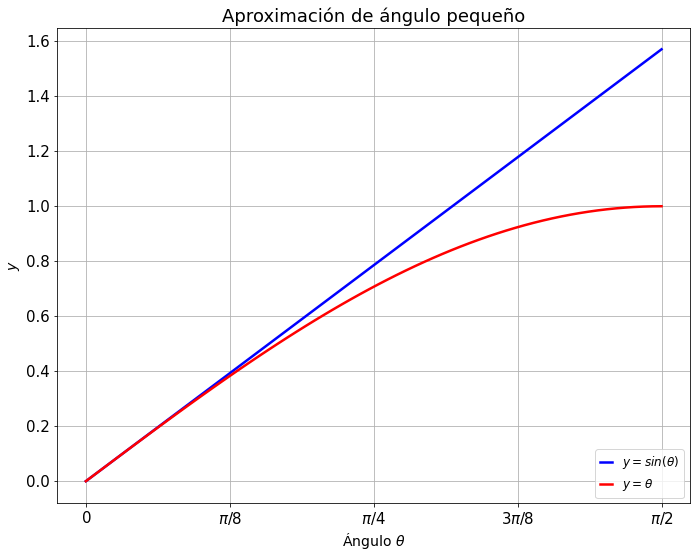

In [78]:
f_lineal = np.linspace(0, np.pi/2, 64,endpoint=True)
f_seno = np.sin(f_lineal)


fig2, ax2 = plt.subplots(figsize=(10, 8), tight_layout=True)

ax2.plot(f_lineal, f_lineal, color="blue",  linewidth=2.5)
ax2.plot(f_lineal, f_seno, color="red", linewidth=2.5)


ax2.set_title(r"Aproximación de ángulo pequeño")
ax2.set_ylabel(r"$y$", fontsize=14)
ax2.set_xlabel(r"Ángulo $\theta$", fontsize=14)
ax2.legend((r"$y=sin(\theta)$",r"$y=\theta $",), shadow=False, loc=(0.85, 0.01), handlelength=1, fontsize=12)
plt.grid()
plt.xticks([0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2],
          [r'$0$', r'$\pi/8$', r'$\pi/4$', r'$3\pi/8$', r'$\pi/2$'])
plt.show()